# **1. Import Library**

In [1]:
# Manipulasi Data 
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling and Encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Model Machine Learning Klasifikasi 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evalusai Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Menyimpan Model
import joblib

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
path = '/Users/bagasnuryaman/Proyek_Akhir_Coding_Camp/BMLP_SatriaDirgantaraNuryaman/data_clustering_inverse.csv'

# Load Data
df = pd.read_csv(path)

# Menampilkan Data
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Anak Muda,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Golden Age,1
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,Orang Tua,2


# **3. Data Splitting**

In [3]:
X = df.drop(columns=['Target'])
y = df['Target']

# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek jumlah data 
print(f'Ukuran data training: {X_train.shape}')
print(f'Ukuran data testing: {X_test.shape}')


Ukuran data training: (2010, 10)
Ukuran data testing: (503, 10)


In [4]:
# Melakukan Encoding dan juga scaling 
le = LabelEncoder()
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Encode semua kolom kategori
categorical_columns = []
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        categorical_columns.append(column)
        X_train_processed[column] = le.fit_transform(X_train[column].astype(str))
        X_test_processed[column] = le.transform(X_test[column].astype(str))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Convert back to DataFrame untuk readability
feature_names = X_train_processed.columns
X_train_final = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train_processed.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test_processed.index)



# **4. Membangung Model Klasfikasi**

## Melatih Model Decision Tree Classifier

In [5]:
# Inisialisasi Model
model_dt = DecisionTreeClassifier(random_state=42)

# Melatih Model
model_dt.fit(X_train_final, y_train)

# Prediksi
y_pred = model_dt.predict(X_test_final)

print('Model Udah Pinter Nih Mamang')

Model Udah Pinter Nih Mamang


## Menyimpan Model 

In [6]:
joblib.dump(model_dt, 'decision_tree_model.h5')

print('Model Udah Disimpan dengan baik Mang')

Model Udah Disimpan dengan baik Mang


# **5. Membangun Model Klasifikasi Lain**

## Melatih Model Selain Decision Tree

In [7]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
}


# Melatih Setiap Model 
for model_name, model in models.items():
    print(f'\nTraning {model_name} Lagi Proses Kawan!')

    # Melatih Model 
    model.fit(X_train_final, y_train)
    
    print(f'{model_name} Udah Pinter Nih Mamang!!!\n')


Traning Decision Tree Lagi Proses Kawan!
Decision Tree Udah Pinter Nih Mamang!!!


Traning Logistic Regression Lagi Proses Kawan!
Logistic Regression Udah Pinter Nih Mamang!!!


Traning Random Forest Lagi Proses Kawan!
Random Forest Udah Pinter Nih Mamang!!!


Traning Gaussian Naive Bayes Lagi Proses Kawan!
Gaussian Naive Bayes Udah Pinter Nih Mamang!!!


Traning Support Vector Machine Lagi Proses Kawan!
Support Vector Machine Udah Pinter Nih Mamang!!!



## Evaluasi Model selain Decision Tree

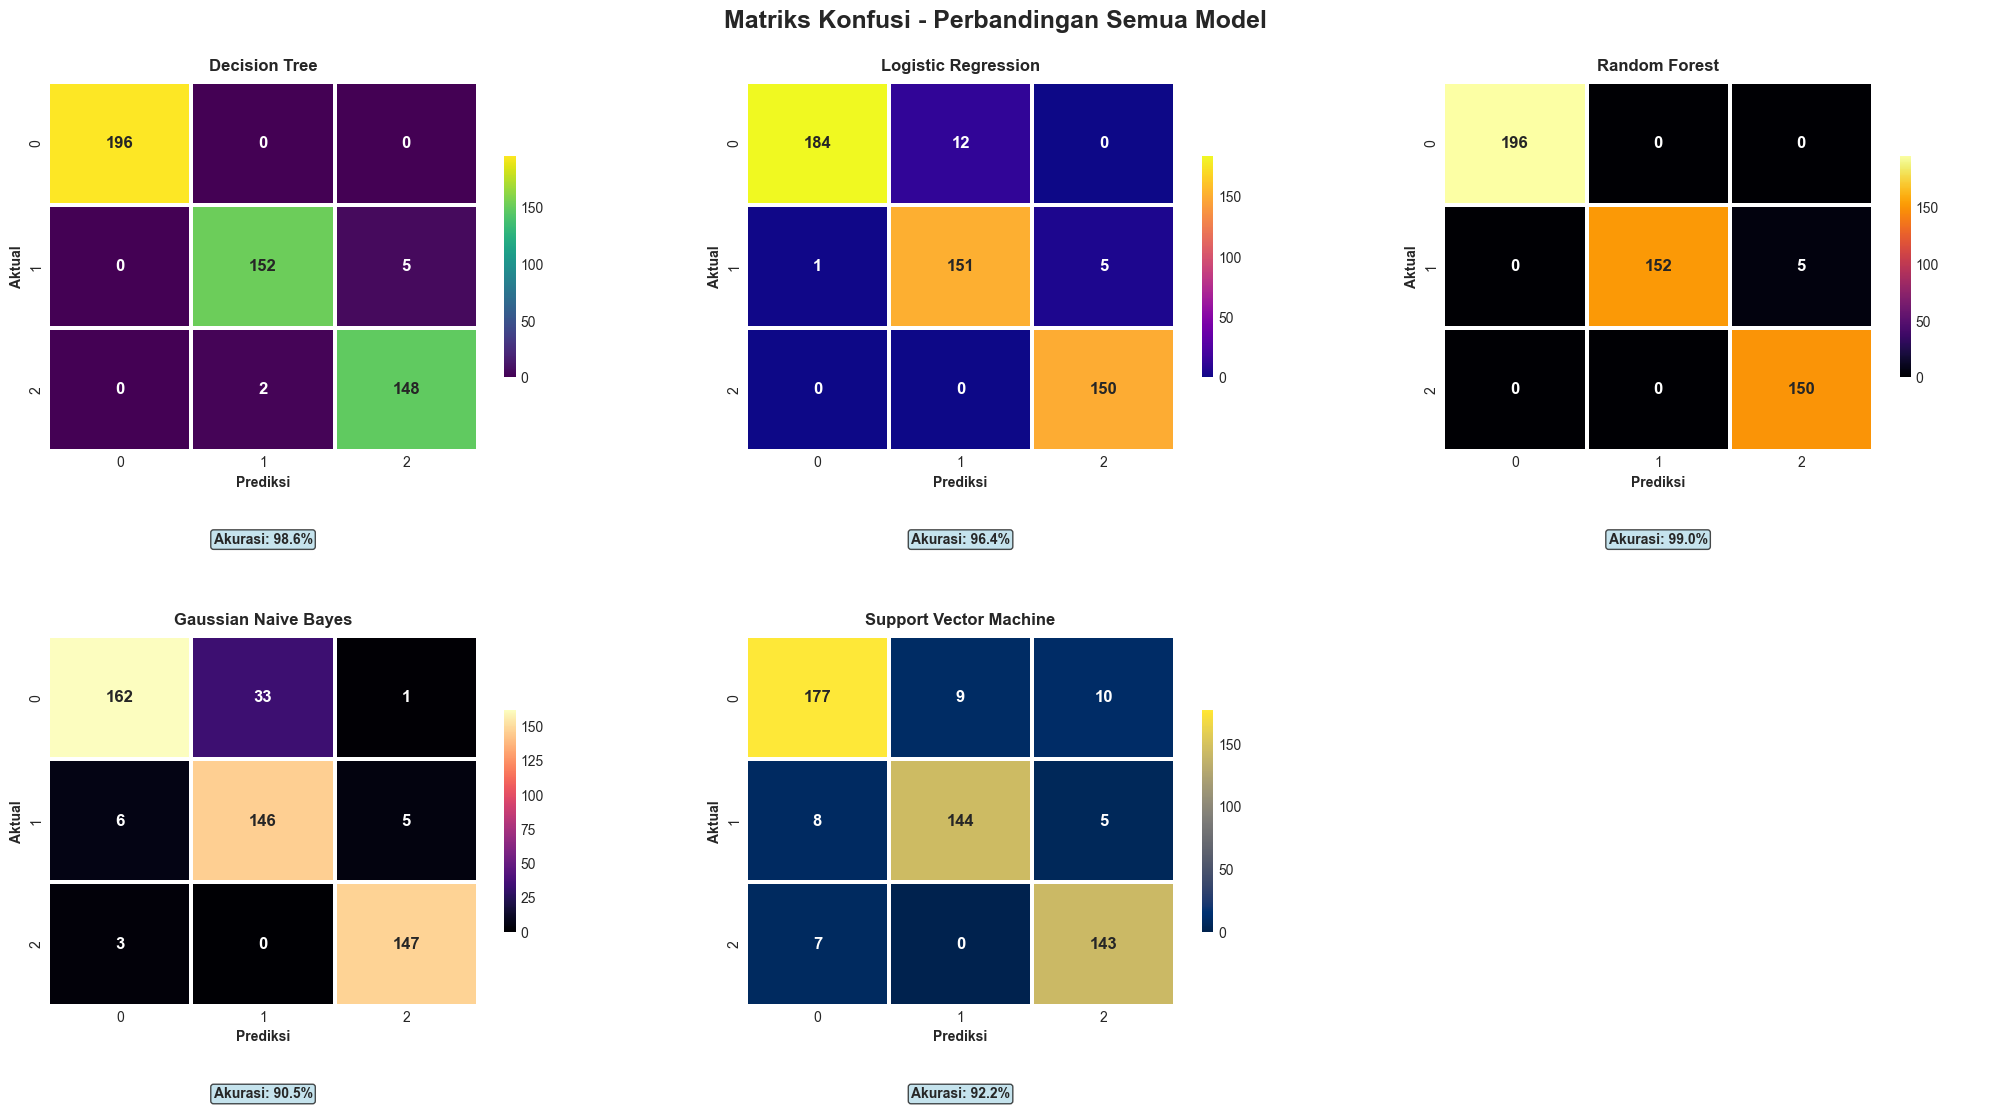

Hasil Evaluasi Model Klasifikasi:


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.9861,0.9862,0.9861,0.9861
Logistic Regression,0.9642,0.9653,0.9642,0.9643
Random Forest,0.9901,0.9904,0.9901,0.9901
Gaussian Naive Bayes,0.9046,0.9103,0.9046,0.9046
Support Vector Machine,0.9225,0.9229,0.9225,0.9224


Model Terbaik Yang Ditemukan Dari Langit Adalah Random Forest dengan akurasi 99.0%

Laporan Klasifikasi Detail  Random Forest:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       196
           1     1.0000    0.9682    0.9838       157
           2     0.9677    1.0000    0.9836       150

    accuracy                         0.9901       503
   macro avg     0.9892    0.9894    0.9891       503
weighted avg     0.9904    0.9901    0.9901       503

Peringkat Model:
1. Random Forest: 99.0%
2. Decision Tree: 98.6%
3. Logistic Regression: 96.4%
4. Support Vector Machine: 92.2%
5. Gaussian Naive Bayes: 90.5%


In [8]:
# Evaluasi Model
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_final)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil ke dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)


# Set style 
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Visualisasi Confusion Matrix untuk Semua Model
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Matriks Konfusi - Perbandingan Semua Model', fontsize=18, fontweight='bold', y=0.98)
ax = ax.flatten()

# Inimah biar ada pembeda doang sih
colors = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

subplot_idx = 0
for model_name, model in models.items():
    if subplot_idx < len(ax):

        # Prediksi untuk confusion matrix
        y_pred = model.predict(X_test_final)
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot dengan warna yang berbeda untuk setiap model
        sns.heatmap(cm, annot=True, fmt='d', cmap=colors[subplot_idx], 
                   ax=ax[subplot_idx], 
                   cbar_kws={'shrink': 0.6},
                   annot_kws={'size': 12, 'weight': 'bold'},
                   linewidths=1.5, linecolor='white')
        
        ax[subplot_idx].set_title(f'{model_name}', fontweight='bold', fontsize=12, pad=8)
        ax[subplot_idx].set_xlabel('Prediksi', fontweight='bold', fontsize=10)
        ax[subplot_idx].set_ylabel('Aktual', fontweight='bold', fontsize=10)
        
        # Akurasi 
        accuracy = results[model_name]['Accuracy']
        ax[subplot_idx].text(0.5, -0.25, f'Akurasi: {accuracy:.1%}', 
                              transform=ax[subplot_idx].transAxes, 
                              ha='center', fontweight='bold', fontsize=10,
                              bbox=dict(boxstyle="round,pad=0.2", facecolor='lightblue', alpha=0.7))
        
        subplot_idx += 1

# Buang subplots kosong
if len(models) < len(ax):
    ax[-1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.15, hspace=0.5, wspace=0.3)
plt.show()

# Analisis hasil tanpa visualisasi tambahan
best_model_name = max(results.keys(), key=lambda x: results[x]['Accuracy'])
y_pred_best = models[best_model_name].predict(X_test_final)

print('Hasil Evaluasi Model Klasifikasi:')
display(results_df)

print(f'Model Terbaik Yang Ditemukan Dari Langit Adalah {best_model_name} dengan akurasi {results[best_model_name]["Accuracy"]:.1%}')

print(f'\nLaporan Klasifikasi Detail  {best_model_name}:')
print(classification_report(y_test, y_pred_best, digits=4))

print('Peringkat Model:')
sorted_models = sorted(results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)
for i, (model_name, metrics) in enumerate(sorted_models, 1):
    print(f'{i}. {model_name}: {metrics["Accuracy"]:.1%}')

- Jika Kita lihat dari visualisasi **Confusion Matrik** yang paling mantaps dan hany salah sedikit itu ada di mdeol **Random Forest** dengan hanya 5 kesalahan pada Class 1 yang mungkin di kira Class 2. Dibuktikan dengan laporan **Classification Report** yang juga menunjukan nilai **Precision** dan **Recall** yang tinggi mencapai 1, udah fix inimah model hapal banget data latih fix inimah.


- Sedangkan kalau Decision Tree ada di peringkat ke 3 dengan akurasi 98.6%. dengan **Confusion Matrik** yang tidak terlalu banyak kesalahan hanya, Class 1 memiliki 5 data yang salah dikira Class 2 mungkin ada kemiripan ciri. Class 2 memiliki 2 data yang salah dikira Class 1.

- Disini aku merubah models menggunakan model yang kemungkinan tidak akan overfitting yaps inilah dia **Naive Bayes** yang paling buruk banget dari semua klasifikasi yang sudah aku coba nanti kita tunning.

## Menyimpan Model selain Decision Tree

In [9]:
# Menyimpan model Random Forest 
best_model = models['Random Forest']
joblib.dump(models, 'explore_random_forest_model.h5')

print('Model Random Forest Sudah Disimpan!')

Model Random Forest Sudah Disimpan!


## Melakukan HyperParameter Tunning kepada Model yang kurang Maksimal

In [10]:
# Menggunakan RandomizedSearchCV untuk hyperparameter tuning pada SVM

# Hyperparameter tuning untuk SVM menggunakan RandomizedSearchCV
param_dist_random = {
    'C': np.logspace(-2, 3, 50),
    'gamma': np.logspace(-4, 1, 50),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# RandomizedSearchCV
svm_random = RandomizedSearchCV(
    SVC(random_state=42),
    param_dist_random,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit random search
svm_random.fit(X_train_final, y_train)

print(f'Random Search Best Score: {svm_random.best_score_:.4f}')
print(f'Random Search Best Params: {svm_random.best_params_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Search Best Score: 0.9672
Random Search Best Params: {'kernel': 'sigmoid', 'gamma': np.float64(0.005428675439323859), 'C': np.float64(390.6939937054621)}


Ternyata terpilih lah parameters terbaik dengan parameter di bawah ini:

```python
    kernel = 'sigmoid'
    gamma = 0.0054
    C = 390.68
```

- Bisa kita lihat kalau menggunkan SVM dengan kernel sigmoid, dan gamma 0.0054, dan C 390.68, maka kita bisa mendapatkan akurasi yang lebih tinggi dari original nya yaitu 0.9672, naik hampir 5% dari SVM yang tanpa tunning.

- Tapi yang menarik disini adalah kernel terbaik adalah 'sigmoid' yang malah kurang populer di karnel SVM, yang populer tuh ada 'rbf' atau 'ploy' yang biasanya lebih populer. Yang menunjukan datanya cocok di pisahkan secara non liner seperti visualisasi kita pada t-SNE yang terbukti data memiliki pola non linear.
- Nilai C yang besar (390.69) menunjukkan model lebih menekankan pada meminimalkan kesalahan pada data training (low bias, high variance), namun tetap tidak overfitting karena validasi tetap tinggi.





In [11]:
# Kalau Ini berdasarkan hasil random search, kita akan fokus pada parameter terbaik yang ditemukan
best_random_params = svm_random.best_params_

# Fine tune around the best parameters
if best_random_params['kernel'] == 'rbf':
    kernel_focus = ['rbf']
elif best_random_params['kernel'] == 'poly':
    kernel_focus = ['poly', 'rbf']  # include rbf as backup
else:
    kernel_focus = [best_random_params['kernel'], 'rbf']

# Mencoba membuat grid search dengan fokus pada parameter terbaik yang ditemukan
param_grid_focused = {
    'C': [
        best_random_params['C'] * 0.1,
        best_random_params['C'] * 0.5,
        best_random_params['C'],
        best_random_params['C'] * 2,
        best_random_params['C'] * 5
    ],
    'gamma': [
        best_random_params['gamma'] * 0.1,
        best_random_params['gamma'] * 0.5,
        best_random_params['gamma'],
        best_random_params['gamma'] * 2,
        best_random_params['gamma'] * 5
    ],
    'kernel': kernel_focus
}

# GridSearchCV untuk finetuning
svm_grid = GridSearchCV(
    SVC(random_state=42),
    param_grid_focused,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
svm_grid.fit(X_train_final, y_train)

print(f'Grid Search Best Score: {svm_grid.best_score_:.4f}')
print(f'Grid Search Best Params: {svm_grid.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Grid Search Best Score: 0.9766
Grid Search Best Params: {'C': np.float64(781.3879874109242), 'gamma': np.float64(0.010857350878647719), 'kernel': 'sigmoid'}


Nah ini mirip mirip dengan Random Search

```python
kernel = 'sigmoid' # sama percis dengan random search
C = 781.39
gamma = 0.01086
```

- Sama nih karnel 'sigmoid' masih tetap menjadi pilihan yang terbaik disini menguatkan dari kedua belah teknik search params, berarti pola pemisahan pada kasus dataset kita ini cocok dengan fungsi aktivasi sigmoid.
- Perbedaan nya hanya ada di parameters C dan gamma saja dan akurasi yang lebih tinggi 1% saja dari random search.


INILAH DIA HASIL TUNING KITA
Accuracy:  0.9682
Precision: 0.9684
Recall:    0.9682
F1 Score:  0.9682


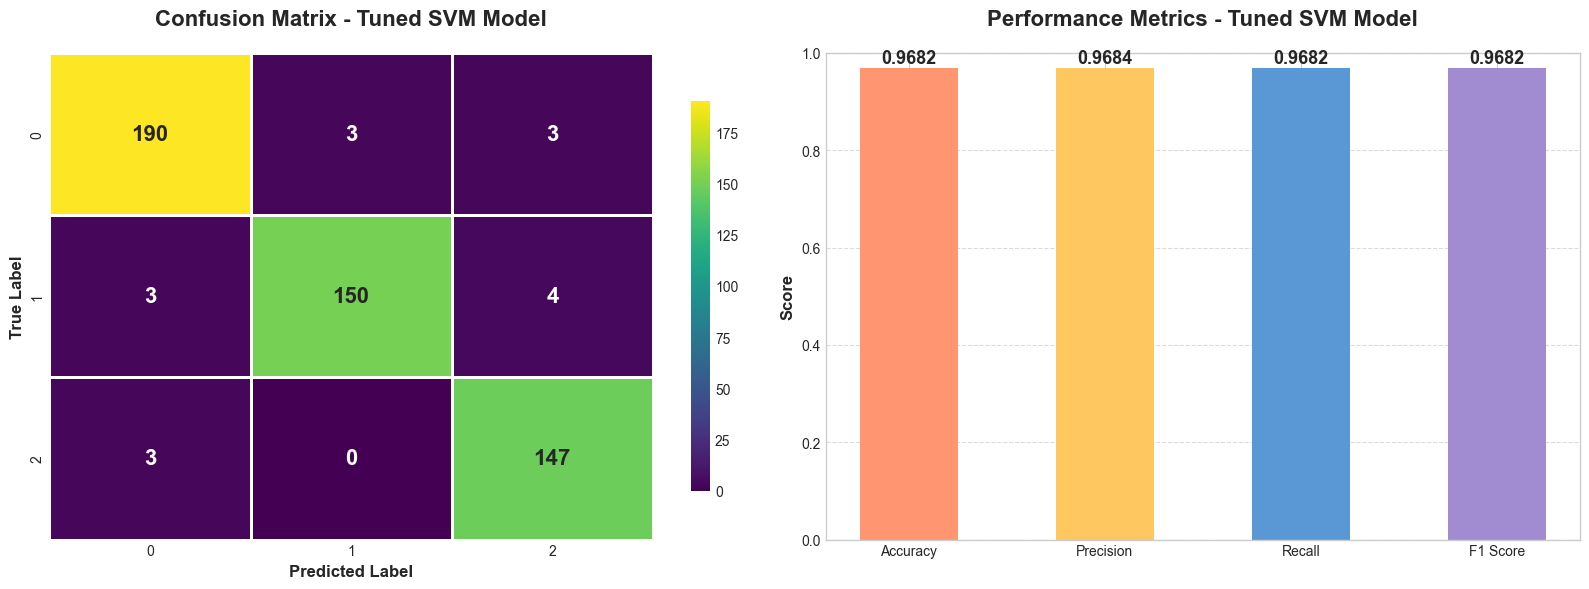


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       196
           1       0.98      0.96      0.97       157
           2       0.95      0.98      0.97       150

    accuracy                           0.97       503
   macro avg       0.97      0.97      0.97       503
weighted avg       0.97      0.97      0.97       503



In [12]:
# Get the best model from RandomizedSearchCV
best_svm = svm_random.best_estimator_

# Make predictions on the test set
y_pred_svm = best_svm.predict(X_test_final)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Print metrics with nice formatting
print("\nINILAH DIA HASIL TUNING KITA")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Create figure for visualization
plt.figure(figsize=(16, 6))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
           cbar_kws={'shrink': 0.8},
           annot_kws={'size': 16, 'weight': 'bold'},
           linewidths=2, linecolor='white')

plt.title('Confusion Matrix - Tuned SVM Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')

# Subplot 2: Metrics Visualization
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['#FF9671', '#FFC75F', '#5A97D5', '#A18CD1']

bars = plt.bar(metrics, values, color=colors, width=0.5)
plt.ylim(0, 1.0)
plt.title('Performance Metrics - Tuned SVM Model', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Berdasarkan hasil evaluasi dan visualisasi, model SVM yang telah di tuning menggunakan RandomizedSearchCV menunjukkan performa **sangat optimal** pada data uji. 

- **Akurasi Tinggi:**  
  Model mencapai **Accuracy 96.82%**, menunjukkan kemampuan klasifikasi yang sangat baik pada data uji. Dengan pembuktian nya adalah dia mampu mengangkat akurasi 5% dari akurasi SVM tanpa tuning.

- **Presisi, Recall, dan F1-Score Konsisten:**  
  Nilai **Precision (96.84%)**, **Recall (96.82%)**, dan **F1 Score (96.82%)** yang hampir identik menandakan model tidak hanya akurat, tetapi juga seimbang dalam menghindari kesalahan di setiap cluster yang di jadikan klasifikasi.

- **Confusion Matrix Informatif:**  
  Visualisasi confusion matrix memperlihatkan prediksi model sangat dominan pada diagonal utama, artinya hampir semua data berhasil diklasifikasikan dengan benar dan kesalahan prediksi sangat kecil.

- **Visualisasi Metrik yang Jelas:**  
  Bar chart memperlihatkan semua metrik evaluasi berada pada level yang sangat tinggi dan seimbang, sehingga mudah dipahami baik untuk analisis teknis maupun presentasi ke stakeholder non-teknis.

---

**Kesimpulan:**  
Model SVM hasil tuning RandomizedSearchCV terbukti sangat efektif dan andal dalam menyelesaikan tugas klasifikasi pada dataset ini. Evaluasi menyeluruh menunjukkan model ini siap digunakan untuk mendukung pengambilan keputusan berbasis data secara akurat dan efisien. Dan mengapa tidak memakai params GridResearch karena dia lebih overfitting 1%, walaupun sama sama overfitting tapi aku mencoba untuk menjadi Machine Learning Engineering yang tidak terpukau dengan keindahan akurasi.

---

> Walaupun menurut aku SVM with RandomScreah ini gak overfitting karena 

- Accuracy, precision, recall, dan F1-score semuanya sekitar 0.97 (97%). 
- Tidak ada gap besar antar metrik, menandakan model tidak hanya fokus pada satu aspek saja.
- Setiap Cluster (0, 1, 2) memiliki precision, recall, dan f1-score yang tinggi dan seimbang (rentang 0.95–0.98).
- Tidak ada kelas yang diabaikan atau jauh lebih rendah performanya.
- Macro avg dan weighted avg juga di angka 0.97, artinya model stabil di seluruh kelas, baik yang jumlahnya banyak maupun sedikit.
- Jumlah data uji (503) cukup representatif untuk mengukur generalisasi model.

Tapi gak tau juga ya karena saya masih pemula hehehe.

## Menyimpan Model Hasil Tunning

In [13]:
joblib.dump(best_svm, 'tunning_classification_model.h5')

print('Model SVM Sudah Disimpan dengan baik Mang')

Model SVM Sudah Disimpan dengan baik Mang
